C:\Users\ESHA\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 305ms/step - accuracy: 0.7623 - loss: 0.6846 - val_accuracy: 0.8893 - val_loss: 0.2954
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 49s 293ms/step - accuracy: 0.9219 - loss: 0.2176 - val_accuracy: 0.9503 - val_loss: 0.1852
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 51s 301ms/step - accuracy: 0.9601 - loss: 0.1421 - val_accuracy: 0.9562 - val_loss: 0.1654
Epoch 4/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 49s 293ms/step - accuracy: 0.9664 - loss: 0.1142 - val_accuracy: 0.9570 - val_loss: 0.1715
Epoch 5/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 46s 273ms/step - accuracy: 0.9657 - loss: 0.1174 - val_accuracy: 0.9611 - val_loss: 0.1841
Epoch 1/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.7381 - loss: 0.7381 - val_accuracy: 0.7550 - val_loss: 0.7379
Epoch 2/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 16s 94ms/step - accuracy: 0.7596 - loss: 0.6949 - val_accuracy: 0.8265 - val_loss: 0.4816
Epoch 3/5
168/168 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - accuracy: 0.8416 - loss: 0.4426 - val

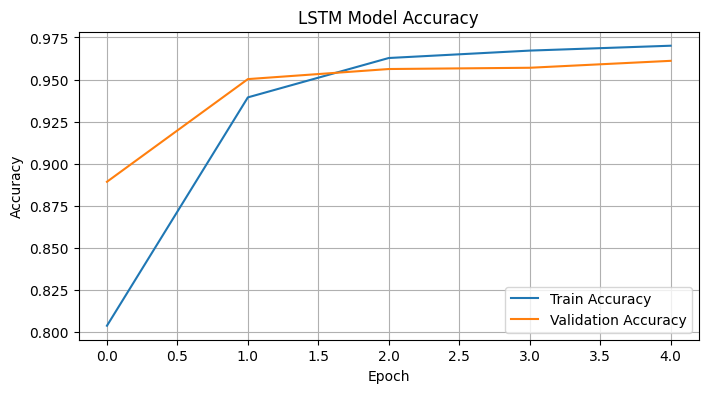

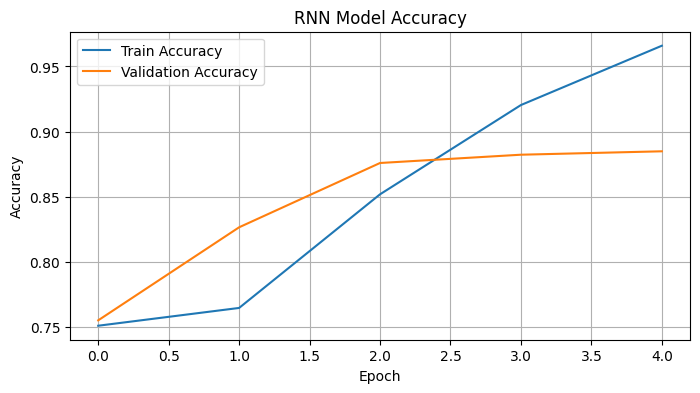

105/105 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step

LSTM Model Classification Report:

              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89       506
     Neutral       0.97      1.00      0.98      2491
    Positive       0.94      0.78      0.85       346

    accuracy                           0.96      3343
   macro avg       0.94      0.89      0.91      3343
weighted avg       0.96      0.96      0.95      3343



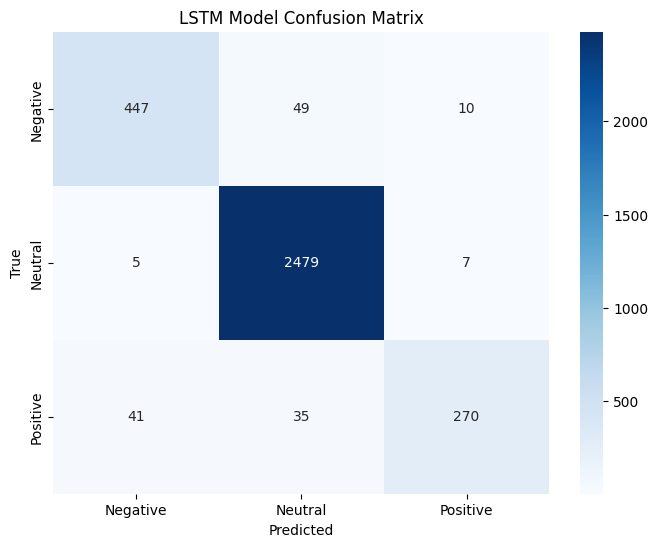

LSTM Model Accuracy: 0.9560
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step

RNN Model Classification Report:

              precision    recall  f1-score   support

    Negative       0.74      0.66      0.70       506
     Neutral       0.95      0.98      0.96      2491
    Positive       0.60      0.53      0.57       346

    accuracy                           0.89      3343
   macro avg       0.76      0.73      0.74      3343
weighted avg       0.88      0.89      0.88      3343



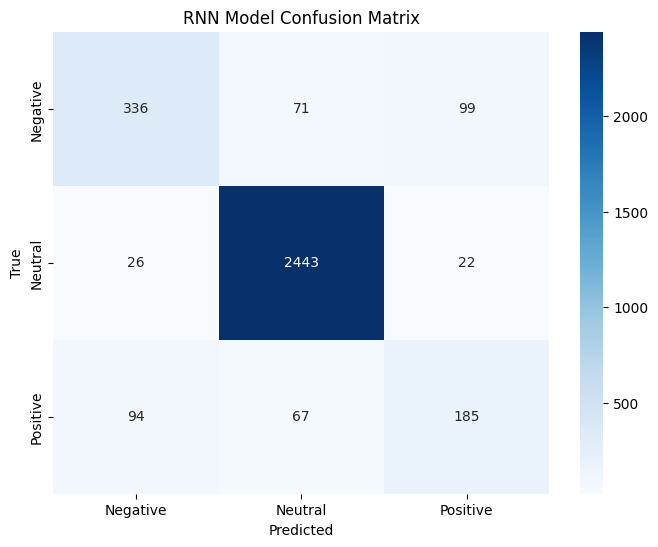

RNN Model Accuracy: 0.8866


In [1]:
# 1. Load Data
import pandas as pd
import re
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, SimpleRNN, Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("swiggydataset.csv")

# 2. Clean and Label Data
positive_keywords = [
    'perfectly', 'tasty', 'highly', 'superb', 'favorite', 'amazing', 'delicious', 'best', 'absolutely',
    'great', 'excellent', 'awesome', 'fantastic', 'wonderful', 'yummy', 'satisfying', 'loved', 'fresh',
    'nice', 'quick', 'prompt', 'hot', 'on time', 'good', 'pleasant', 'flavorful', 'enjoyed'
]

negative_keywords = [
    'late', 'terrible', 'disappointed', 'worst', 'not worth', 'wouldn’t', 'cold', 'ruined',
    'bad', 'slow', 'rude', 'stale', 'awful', 'unpleasant', 'overcooked', 'underwhelming',
    'not good', 'delay', 'missing', 'poor', 'hard', 'burnt', 'bland', 'dirty'
]

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|@\S+|#\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def get_sentiment(review):
    review = review.lower()
    if any(kw in review for kw in positive_keywords):
        return 'Positive'
    elif any(kw in review for kw in negative_keywords):
        return 'Negative'
    else:
        return 'Neutral'

# Apply cleaning and labeling
df['Cleaned_Review'] = df['full_text'].apply(clean_text)
df['Review_Label'] = df['Cleaned_Review'].apply(get_sentiment)

# 3. Tokenization and Encoding
max_words = 5000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Cleaned_Review'])
sequences = tokenizer.texts_to_sequences(df['Cleaned_Review'])
X_padded = pad_sequences(sequences, maxlen=max_len)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Review_Label'])
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.2, random_state=42)

# 4. Define and Train LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(32, activation='relu'))
lstm_model.add(Dense(3, activation='softmax'))

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 5. Define and Train RNN Model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(128, return_sequences=True))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(32, activation='relu'))
rnn_model.add(Dense(3, activation='softmax'))

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

# 6. Function to Plot Accuracy
def plot_validation_accuracy(history, model_name):
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Validation Accuracy
plot_validation_accuracy(lstm_history, "LSTM Model")
plot_validation_accuracy(rnn_history, "RNN Model")

# 7. Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_test_true = y_test.argmax(axis=1)

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test_true, y_pred_classes, target_names=label_encoder.classes_))

    cm = confusion_matrix(y_test_true, y_pred_classes)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    accuracy = accuracy_score(y_test_true, y_pred_classes)
    print(f"{name} Accuracy: {accuracy:.4f}")

# 8. Evaluate Both Models
evaluate_model(lstm_model, "LSTM Model")
evaluate_model(rnn_model, "RNN Model")

# 9. Interactive Prediction
def predict_sentiment(review, model):
    cleaned_review = clean_text(review)
    sequence = tokenizer.texts_to_sequences([cleaned_review])
    padded = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded)
    predicted_class = prediction.argmax(axis=1)[0]
    label = label_encoder.inverse_transform([predicted_class])[0]
    return label


In [3]:
print("\nEnter reviews to predict sentiment (type 'exit' to quit):\n")
while True:
    user_review = input("Your review: ")
    if user_review.lower() == 'exit':
        print("Exiting prediction loop.")
        break
    print("  ➤ LSTM Prediction:", predict_sentiment(user_review, lstm_model))
    print("  ➤ RNN Prediction: ", predict_sentiment(user_review, rnn_model))



Enter reviews to predict sentiment (type 'exit' to quit):



Your review:  The food was good.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
  ➤ LSTM Prediction: Positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
  ➤ RNN Prediction:  Positive


Your review:  The food was okay.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
  ➤ LSTM Prediction: Neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
  ➤ RNN Prediction:  Neutral


Your review:  The food was bad.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
  ➤ LSTM Prediction: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
  ➤ RNN Prediction:  Negative


Your review:  exit


Exiting prediction loop.
